In [69]:
from paddleocr import PaddleOCR,draw_ocr
import cv2
import random
import pytesseract
from PIL import Image, ImageDraw 
from PIL import ImagePath  
import matplotlib.pyplot as plt
import numpy as np
import glob


pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
ocr = PaddleOCR(use_angle_cls=True, lang='en') 

Namespace(cls_batch_num=30, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\GNG/.paddleocr/2.0/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_thresh=0.3, det_db_unclip_ratio=2.0, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\GNG/.paddleocr/2.0/det', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='en', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=30, rec_char_dict_path='./ppocr/utils/dict/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='C:\\Users\\GNG/.paddleocr/2.0/rec/en', use_angle_cls=True, use_gpu=True, use_pdserving=False, use_space_char=True, use_tensorrt=False, use_zero_copy_run=False)


# Get the min x and y

We only need ocr of first part of the page. So we are going to take the min x and y on the image detected that will be most probably the name of in the card than we will try to crop it slightly before the first page ends. 

In [70]:
# First bounding box detected

def get_boxes(p_ocr_result):
    x_points = [polygon[0][0] for polygon in result]
    first_eight_bbox= sorted(sorted(result, key = lambda x: x[0][0][0])[:8], key = lambda x: x[1])
    top_three_bbox= sorted(result, key = lambda x: x[0][0][1])[:3]
    first_eight_bbox.extend(top_three_bbox)
    return first_eight_bbox


# Crop Fields
 to pass again to OCR for Better accuracy 

In [77]:
def get_text(img_path, first_eight_bbox):
    full_img = Image.open(img_path)
    for i in first_eight_bbox:
        im1 = full_img.crop((i[0][0][0], i[0][0][1], i[0][2][0],i[0][2][1]))
        img = np.asarray(im1)


        img = cv2.bilateralFilter(img, 9,20, 20)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        custom_oem_psm_config = r'--oem 3 --psm 6'
        ocr_tesseract = pytesseract.image_to_string(Image.fromarray(img), lang='eng', config=custom_oem_psm_config)
        print(ocr_tesseract)
        i[1]= ocr_tesseract
    return first_eight_bbox
    

# Plot OCR

In [92]:
images_list = glob.glob("images/check.jpg")

for img_path in  images_list:   
    # Reading image
    img = Image.open(img_path)

    # Getting ocr
    result               = ocr.ocr(img_path, cls=True)
    print(result)
#     first_eight_bbox     = get_boxes(result)
    first_eight_bbox     = get_text(img_path, first_eight_bbox)
    
    # Plotting image
    img1 = ImageDraw.Draw(img)   
    for polygon in first_eight_bbox:
        text    = "".join([i for i in polygon[1] if i.isalpha() or i.isdigit() or i == ' '])
        xy      = [tuple(i) for i in polygon[0]]
        
        img1.polygon(xy, outline ="blue") 
        img1.text(xy[0], text)

    # Displaying Image
    img.show() 

[2021/02/27 16:14:40] root INFO: dt_boxes num : 42, elapse : 1.1469473838806152
[2021/02/27 16:14:40] root INFO: cls num  : 42, elapse : 0.4399538040161133
[2021/02/27 16:14:41] root INFO: rec_res num  : 42, elapse : 1.2408063411712646
[[[[115.0, 241.0], [384.0, 260.0], [377.0, 365.0], [107.0, 346.0]], ('BO', 0.54547477)], [[[443.0, 291.0], [593.0, 295.0], [592.0, 329.0], [442.0, 325.0]], ('OUTILGa', 0.57912874)], [[[1119.0, 297.0], [1166.0, 297.0], [1166.0, 320.0], [1119.0, 320.0]], ('Date', 0.99943286)], [[[1210.0, 309.0], [1280.0, 304.0], [1282.0, 333.0], [1212.0, 337.0]], ('Os', 0.51671076)], [[[1385.0, 308.0], [1409.0, 308.0], [1409.0, 331.0], [1385.0, 331.0]], ('2', 0.8010114)], [[[72.0, 318.0], [128.0, 318.0], [128.0, 347.0], [72.0, 347.0]], ('Ric', 0.6718673)], [[[444.0, 335.0], [611.0, 337.0], [611.0, 371.0], [443.0, 368.0]], ('Moratuwa', 0.9995426)], [[[1336.0, 350.0], [1357.0, 350.0], [1357.0, 369.0], [1336.0, 369.0]], ('M', 0.97241)], [[[1215.0, 352.0], [1230.0, 352.0], [12

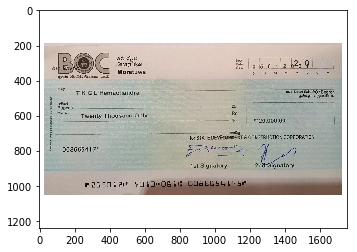

In [89]:
img = Image.open("images/check.jpg")
img = img.rotate(90, expand=1)
img.save("images/check.jpg")
plt.imshow(img)
plt.show()

In [93]:
# import Craft class
from craft_text_detector import Craft

# set image path and export folder directory
image_path = "images/check.jpg"
output_dir = 'outputs/'

# create a craft instance
craft = Craft(output_dir=output_dir, crop_type="poly", cuda=False)

# apply craft text detection and export detected regions to output directory
prediction_result = craft.detect_text(image_path)

# unload models from ram/gpu
craft.unload_craftnet_model()
craft.unload_refinenet_model()

Craft text detector weight will be downloaded to C:\Users\GNG\.craft_text_detector\weights\craft_mlt_25k.pth


Downloading...
From: https://drive.google.com/uc?id=1bupFXqT-VU6Jjeul13XP7yx2Sg5IHr4J
To: C:\Users\GNG\.craft_text_detector\weights\craft_mlt_25k.pth
83.2MB [03:06, 446kB/s]


Craft text refiner weight will be downloaded to C:\Users\GNG\.craft_text_detector\weights\craft_refiner_CTW1500.pth


Downloading...
From: https://drive.google.com/uc?id=1xcE9qpJXp4ofINwXWVhhQIh9S8Z7cuGj
To: C:\Users\GNG\.craft_text_detector\weights\craft_refiner_CTW1500.pth
100%|█████████████████████████████████████████████████████████████████████████████| 1.85M/1.85M [00:01<00:00, 1.04MB/s]


# Get Text Rotation